In [182]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import numpy as np
import seaborn as sns

#Plot

In [185]:
df=pd.read_csv('/content/drive/MyDrive/energy_track_data.csv')

<ipython-input-185-4e014a72e944>:1: DtypeWarning: Columns (9,15,216,217) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/energy_track_data.csv')


In [ ]:
# Drop rows with 'not available' in 'Net Emissions (Metric Tons CO2e)' column
columns_to_clean = ['Net Emissions (Metric Tons CO2e)',
                    'Site EUI (kBtu/ft²)',
                   'Electricity Use - Grid Purchase (kBtu)',
                   'Natural Gas Use (kBtu)',
                   'Water Use (All Water Sources) (kgal)']

for column in columns_to_clean:
    # Convert non-numeric values to NaN and numbers to numeric type
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows where any of the specified columns have NaN
df = df.dropna(subset=columns_to_clean)

# Select columns of interest
selected_columns_df = df[['Postal Code', 'Net Emissions (Metric Tons CO2e)',
                          'Site EUI (kBtu/ft²)','Electricity Use - Grid Purchase (kBtu)',
                          'Natural Gas Use (kBtu)','Water Use (All Water Sources) (kgal)']]

# Group by 'Postal Code' and compute the mean for each ZIP code
agg_df = selected_columns_df.groupby('Postal Code').mean().reset_index()

url = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ny_new_york_zip_codes_geo.min.json"
num_categories = 10
bin_edges = np.linspace(agg_df['Net Emissions (Metric Tons CO2e)'].min(), agg_df['Net Emissions (Metric Tons CO2e)'].max(), num_categories)
m_e = folium.Map(location=[40.7128, -74.0060], zoom_start=10) # Coordinates for New York

# URL to GeoJSON data for New York zip codes
folium.Choropleth(
    geo_data=url,
    name='choropleth',
    data=agg_df,
    columns=['Postal Code', 'Net Emissions (Metric Tons CO2e)'],
    key_on='feature.properties.ZCTA5CE10',  # this might vary based on the GeoJSON source
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins=bin_edges,  # Use the calculated bins
    legend_name='GHG Emission'
).add_to(m_e)

folium.LayerControl().add_to(m_e)

m_e.save('emission_map.html') # This will save the map to a file

url = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ny_new_york_zip_codes_geo.min.json"
num_categories = 10
bin_edges = np.linspace(agg_df['Site EUI (kBtu/ft²)'].min(), agg_df['Site EUI (kBtu/ft²)'].max(), num_categories)
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10) # Coordinates for New York

# URL to GeoJSON data for New York zip codes
folium.Choropleth(
    geo_data=url,
    name='choropleth',
    data=agg_df,
    columns=['Postal Code', 'Site EUI (kBtu/ft²)'],
    key_on='feature.properties.ZCTA5CE10',  # this might vary based on the GeoJSON source
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins=bin_edges,  # Use the calculated bins
    legend_name='Energy Use (Site_eui)'
).add_to(m)

folium.LayerControl().add_to(m)

folium.LayerControl().add_to(m)

m.save('energy_use_map1.html') # This will save the map to a file

#**Correlation **

Text(0.5, 1.0, 'Correlation between Natural Gas Use, Electricity Use, Water Use, and Total GHG Emmision Intensity')

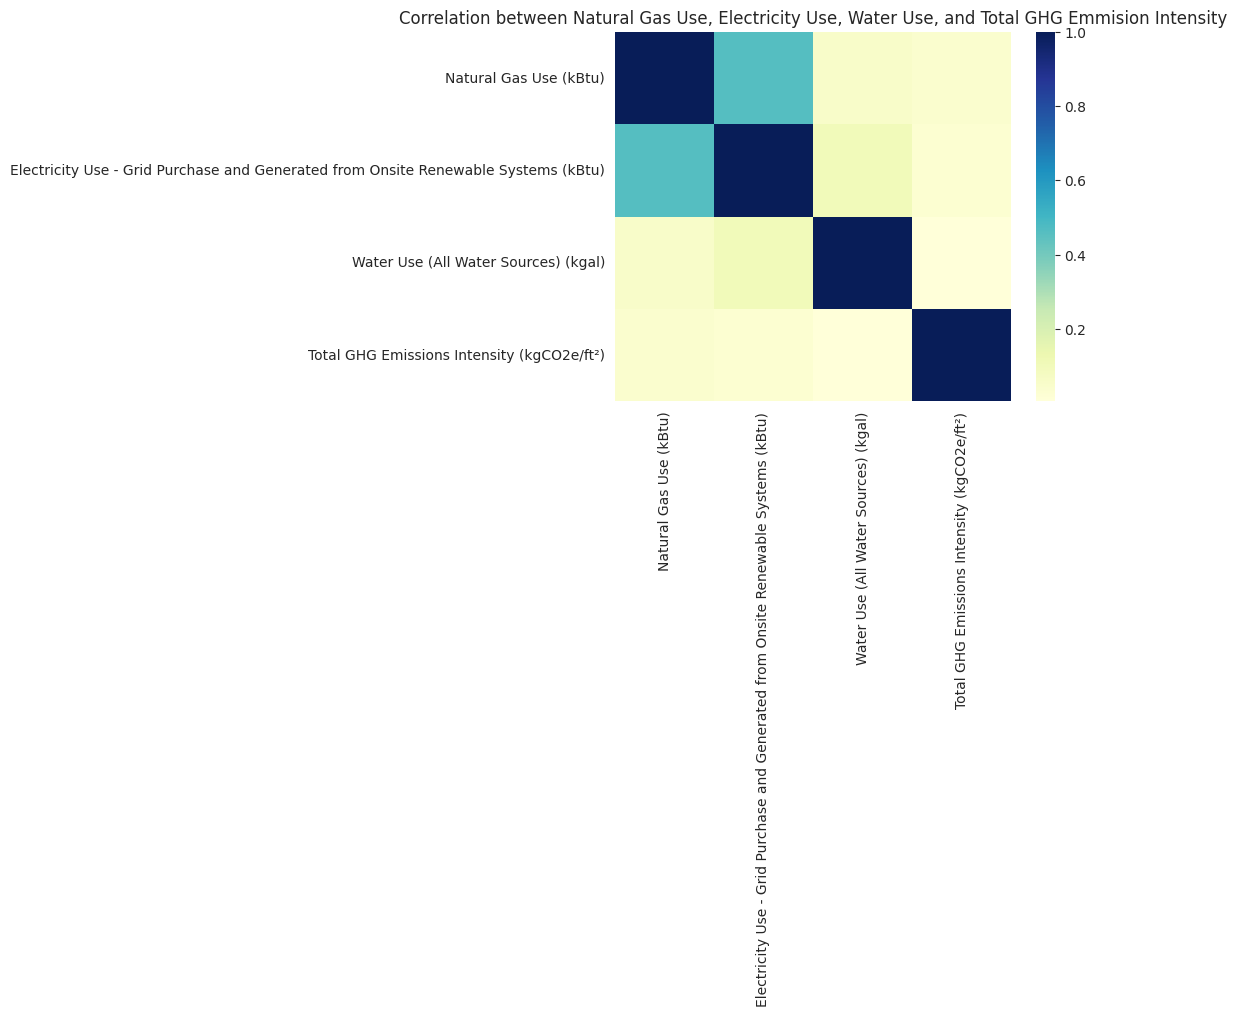

In [186]:
df=pd.read_csv('/content/drive/MyDrive/energy_track_data.csv')
#Correlation between Natural Gas, Electricity, Water use, and Total GHG Emissions Intensity
selected_columns=df[['Natural Gas Use (kBtu)','Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)','Water Use (All Water Sources) (kgal)','Total GHG Emissions Intensity (kgCO2e/ft²)']]
selected=pd.DataFrame(selected_columns)
selected.replace('Not Available',np.nan,inplace=True)
selected=selected.apply(pd.to_numeric, errors='coerce')
corr_matrix=selected.corr()
corr_matrix

Corr_heatmap=sns.heatmap(corr_matrix,cmap='YlGnBu')
Corr_heatmap.set_title('Correlation between Natural Gas Use, Electricity Use, Water Use, and Total GHG Emmision Intensity')

In [187]:
#Correlation between Site EUI and Total GHG Emissions Intensity
selected_column2=df[['Site EUI (kBtu/ft²)','Total GHG Emissions Intensity (kgCO2e/ft²)']]
selected2=pd.DataFrame(selected_column2)
selected2.replace('Not Available',np.nan,inplace=True)
selected2=selected2.apply(pd.to_numeric, errors='coerce')
corr_matrix2=selected2.corr()
corr_matrix2

,Site EUI (kBtu/ft²),Total GHG Emissions Intensity (kgCO2e/ft²)
Site EUI (kBtu/ft²),1.000000,0.999273
Total GHG Emissions Intensity (kgCO2e/ft²),0.999273,1.000000


#data clean

In [153]:
df=pd.read_csv('/content/drive/MyDrive/energy_track_data.csv')

(29842, 249)

In [156]:
# 1. Identify columns to drop
threshold = 0.7  # Adjust this value as per your requirements
cols_to_drop = [col for col in df.columns if (df[col] == 'Not Available').mean() > threshold]
print(df.shape)

# Drop identified columns
df.drop(columns=cols_to_drop, inplace=True)
print(df.shape)
# 2. Remove rows with 'Not Available' in retained columns
df = df[~(df == 'Not Available').any(axis=1)]
print(df.shape)
# 3. Convert all numerical-like values to numerical format
for col in df.columns:
    try:
        # Try converting the column to a numerical type
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        # If conversion fails, it remains as is (probably a genuinely non-numerical column)
        pass
print(df.shape)


(29842, 249)
(29842, 115)
(1367, 115)
(1367, 115)


<ipython-input-156-1a27cc43445c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col])


In [160]:
def is_number(s):
    """Check if the string s can be converted to a float."""
    try:
        float(s)
        return True
    except ValueError:
        return False

# 1. Identify columns to drop based on the threshold for 'Not Available' values
threshold = 0.7  # Adjust this value as per your requirements
cols_to_drop = [col for col in df.columns if (df[col] == 'Not Available').mean() > threshold]
print(f"Original shape: {df.shape}")

# Drop identified columns
df.drop(columns=cols_to_drop, inplace=True)
print(f"Shape after dropping columns: {df.shape}")

# 2. Remove rows with 'Not Available' only in numerical columns based on the first entry
numerical_cols = [col for col in df.columns if is_number(df[col].iloc[0])]
for col in numerical_cols:
    df = df[df[col] != 'Not Available']
print(f"Shape after dropping rows with 'Not Available' in numerical columns: {df.shape}")

# 3. Convert all numerical-like values to numerical format
for col in df.columns:
    try:
        # Try converting the column to a numerical type
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        # If conversion fails, it remains as is (probably a genuinely non-numerical column)
        pass

print(f"Shape after converting to numeric: {df.shape}")


Original shape: (29842, 115)
Shape after dropping columns: (29842, 115)
Shape after dropping rows with 'Not Available' in numerical columns: (7373, 115)
Shape after converting to numeric: (7373, 115)


In [149]:
df.shape

(1367, 115)

In [146]:
df_af.shape

(1367, 10)

#feature selection

In [161]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Remove columns with a mix of numbers and text
cols_to_remove = []
for col in df.columns:
    unique_values = df[col].dropna().unique()
    has_number = any(isinstance(val, (int, float)) for val in unique_values)
    has_string = any(isinstance(val, str) for val in unique_values)

    if has_number and has_string:
        cols_to_remove.append(col)

df = df.drop(columns=cols_to_remove)

# Step 2: Handle "Not Available" values
# Remove columns with majority "Not Available"
threshold = 0.6 * len(df)  # Threshold set to 60% (adjust if needed)
cols_to_remove = df.columns[df.isin(["Not Available"]).sum(axis=0) > threshold]
df = df.drop(columns=cols_to_remove)

# Remove rows with "Not Available"
df = df[~df.isin(["Not Available"]).any(axis=1)]

# Convert numerical strings to numbers
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        pass

# Step 3: Univariate feature selection
# Assuming your target variable is named 'Site EUI (kBtu/ft²)'

# Split dataframe into numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()
num_cols.remove('Site EUI (kBtu/ft²)') if 'Site EUI (kBtu/ft²)' in num_cols else None

correlation_threshold = 0.6
selected_num_cols = [col for col in num_cols if abs(df[col].corr(df['Site EUI (kBtu/ft²)'])) > correlation_threshold]

selected_cat_cols = []
for col in cat_cols:
    contingency = pd.crosstab(df[col], df['Site EUI (kBtu/ft²)'])
    chi2, p, _, _ = chi2_contingency(contingency)

    if p < 0.05:  # significance level of 0.05
        selected_cat_cols.append(col)

selected_cols = selected_num_cols + selected_cat_cols + ['Site EUI (kBtu/ft²)']
df_af = df[selected_cols]




<ipython-input-161-6bec595f65c4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)


       ENERGY STAR Score  Weather Normalized Site EUI (kBtu/ft²)  \
0                   71.0                                    70.4   
1                  100.0                                    19.2   
2                   84.0                                    72.0   
3                    3.0                                   121.1   
7                   42.0                                   127.4   
...                  ...                                     ...   
29794               24.0                                    75.6   
29795               33.0                                   153.1   
29799               87.0                                    25.7   
29800               69.0                                    69.4   
29818               98.0                                    60.0   

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                                    0.5            
1                                            

df_af

In [162]:
df_af.columns

Index(['ENERGY STAR Score', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'Total GHG Emissions Intensity (kgCO2e/ft²)',
       'Direct GHG Emissions Intensity (kgCO2e/ft²)', 'Property Name',
       'Parent Property Id', 'Parent Property Name',
       'NYC Borough, Block and Lot (BBL)',
       'NYC Building Identification Number (BIN)', 'Address 1', 'City',
       'Primary Property Type - Self Selected',
       'Primary Property Type - Portfolio Manager-Calculated',
       'National Median Reference Property Type',
       'List of All Property Use Types at Property',
       'Largest Property Use Type', 'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid Purchase (kWh)',
       'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
       'Electricity Use - Grid Purchase and Generated from On

In [165]:
columns_to_drop = [
    'Weather Normalized Site EUI (kBtu/ft²)',
    'Source EUI (kBtu/ft²)',
    'Weather Normalized Source EUI (kBtu/ft²)',
    'Property Name',
    'Parent Property Id',
    'Parent Property Name',
    'NYC Building Identification Number (BIN)',
    'Address 1',
    'List of All Property Use Types at Property',
    'Estimated Data Flag - Electricity (Grid Purchase)',
    'Estimated Values - Water',
    'Temporary Values',
    'Property Notes',
    'Last Modified Date - Property',
    'Last Modified Date - Electric Meters',
    'Last Modified Date - Gas Meters',
    'Last Modified Date - Non-Electric Non-Gas Energy Meters',
    'Last Modified Date - Water Meters',
    'Last Modified Date - Property Use',
    'Generation Date',
    'Submission Date',
    'NTA',
    'ENERGY STAR Score',
    'Electricity Use - Grid Purchase (kBtu)',
    'Electricity Use - Grid Purchase (kWh)',
    'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
    'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
    'Weather Normalized Site Natural Gas Intensity (therms/ft²)'
]

# Drop the columns
df_af = df_af.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' ensures the code doesn't break if a column isn't present

print(df_af.head())


   Total GHG Emissions Intensity (kgCO2e/ft²)  \
0                                         4.3   
1                                         1.5   
2                                         4.0   
3                                         6.8   
7                                         6.8   

   Direct GHG Emissions Intensity (kgCO2e/ft²)  \
0                                          2.3   
1                                          0.2   
2                                          2.9   
3                                          4.8   
7                                          5.4   

  NYC Borough, Block and Lot (BBL)              City  \
0                       4006520042  Long Island City   
1                     1-01206-0001          New York   
2                     1-01832-0043          New York   
3                     1-00142-0025          New York   
7                     1-02122-0120          New York   

  Primary Property Type - Self Selected  \
0                   Mult

In [166]:
df_af.columns

Index(['Total GHG Emissions Intensity (kgCO2e/ft²)',
       'Direct GHG Emissions Intensity (kgCO2e/ft²)',
       'NYC Borough, Block and Lot (BBL)', 'City',
       'Primary Property Type - Self Selected',
       'Primary Property Type - Portfolio Manager-Calculated',
       'National Median Reference Property Type', 'Largest Property Use Type',
       'Multifamily Housing - Resident Population Type', 'Borough',
       'Site EUI (kBtu/ft²)'],
      dtype='object')

#XGB and random forest


In [180]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# 1. Convert categorical columns to one-hot encoded form
# Assuming your target variable is named 'Site EUI (kBtu/ft²)' and all other columns are features
X = df_af.drop('Site EUI (kBtu/ft²)', axis=1)
y = df_af['Site EUI (kBtu/ft²)']

# Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode
X_encoded = pd.get_dummies(X, columns=cat_cols)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 3. Train an XGBoost model on the training data
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

# 4. Evaluate the model on the test data
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")
print(r2_score(y_test, y_pred))


Mean Squared Error on Test Data: 73.347686751834
0.9503402578880928


In [181]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your dataframe is called df and your target variable is 'target'


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict using the test set
y_pred = rf_regressor.predict(X_test)

# Calculate metrics to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 178.55366196145204
R^2 Score: 0.879110995877172


0.9312833732035923


#Histogram

In [188]:
df=pd.read_csv('/content/drive/MyDrive/energy_track_data.csv')
# Extract numeric portion for ZIP codes
df['Postal Code'] = df['Postal Code'].str.extract('(\d{5})')

# Convert to integers where possible and NaN otherwise
df['Postal Code'] = pd.to_numeric(df['Postal Code'], errors='coerce')

# Remove rows where 'Postal Code' is NaN (i.e., non-numeric or invalid ZIP codes)
df = df.dropna(subset=['Postal Code'])

# Convert cleaned zipcodes to integer
df['Postal Code'] = df['Postal Code'].astype(int)

<ipython-input-188-1d5b997f0595>:1: DtypeWarning: Columns (9,15,216,217) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/energy_track_data.csv')
<ipython-input-188-1d5b997f0595>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal Code'] = df['Postal Code'].astype(int)


In [189]:
df['Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Site EUI (kBtu/ft²)'], errors='coerce')
df = df.dropna(subset=['Site EUI (kBtu/ft²)'])
df['Site EUI (kBtu/ft²)'] = df['Site EUI (kBtu/ft²)'].astype(float)

<ipython-input-189-c151df15678b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Site EUI (kBtu/ft²)'] = df['Site EUI (kBtu/ft²)'].astype(float)


In [ ]:
#pd.set_option('display.max_rows', None)
#property_type_counts = df['Primary Property Type - Portfolio Manager-Calculated'].value_counts()
#property_type_counts

In [190]:
# Calculate the average of eui for each property type
eui_avg_per_property_type = df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Site EUI (kBtu/ft²)'].mean()
eui_avg_per_property_type_sorted = eui_avg_per_property_type.sort_values(ascending=False)
print(eui_avg_per_property_type_sorted)

Primary Property Type - Portfolio Manager-Calculated
Fast Food Restaurant                     386.400000
Laboratory                               305.058824
Data Center                              278.800000
Supermarket/Grocery Store                239.845977
Hospital (General Medical & Surgical)    237.018182
                                            ...    
Non-Refrigerated Warehouse                48.649280
Parking                                   46.186000
Lifestyle Center                          34.150000
Convention Center                         32.600000
Self-Storage Facility                     24.882648
Name: Site EUI (kBtu/ft²), Length: 67, dtype: float64


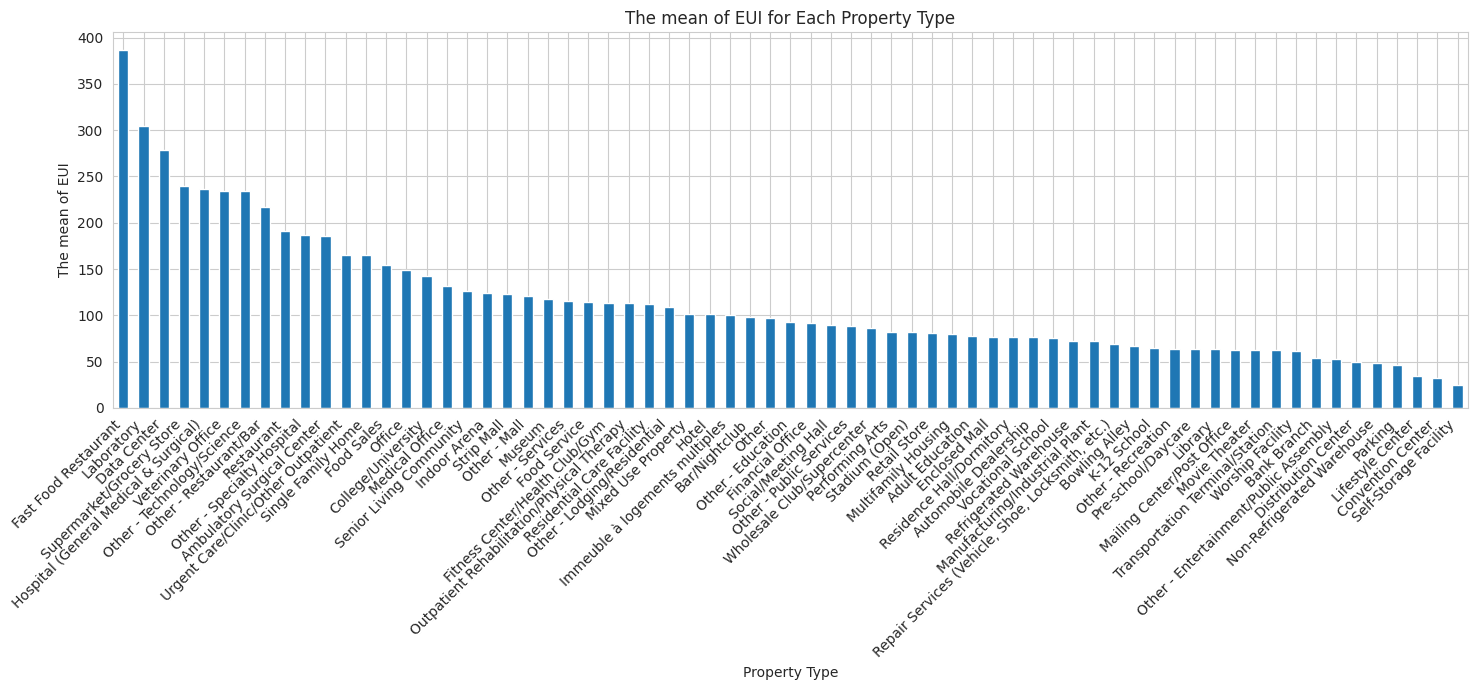

In [191]:
eui_avg_per_property_type_sorted.plot(kind='bar', figsize=(15,7))
plt.title('The mean of EUI for Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('The mean of EUI')
plt.xticks(rotation=45, ha='right')  # rotate x labels for better readability
plt.tight_layout()
plt.show()

In [18]:
df['Natural Gas Use (kBtu)'] = pd.to_numeric(df['Natural Gas Use (kBtu)'], errors='coerce')
df = df.dropna(subset=['Natural Gas Use (kBtu)'])
df['Natural Gas Use (kBtu)'] = df['Natural Gas Use (kBtu)'].astype(int)
gas_avg_per_property_type = df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Natural Gas Use (kBtu)'].mean()
gas_avg_per_property_type_sorted = gas_avg_per_property_type.sort_values(ascending=False)
print(gas_avg_per_property_type_sorted)

Primary Property Type - Portfolio Manager-Calculated
Hospital (General Medical & Surgical)    1.724292e+08
Other - Specialty Hospital               1.020052e+08
Financial Office                         4.647658e+07
Laboratory                               3.846595e+07
Stadium (Open)                           3.250845e+07
                                             ...     
Immeuble à logements multiples           9.688350e+05
Vocational School                        8.810730e+05
Single Family Home                       3.327740e+05
Convention Center                        2.323840e+05
Data Center                              0.000000e+00
Name: Natural Gas Use (kBtu), Length: 66, dtype: float64


<ipython-input-18-4f3827b5033d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Natural Gas Use (kBtu)'] = df['Natural Gas Use (kBtu)'].astype(int)


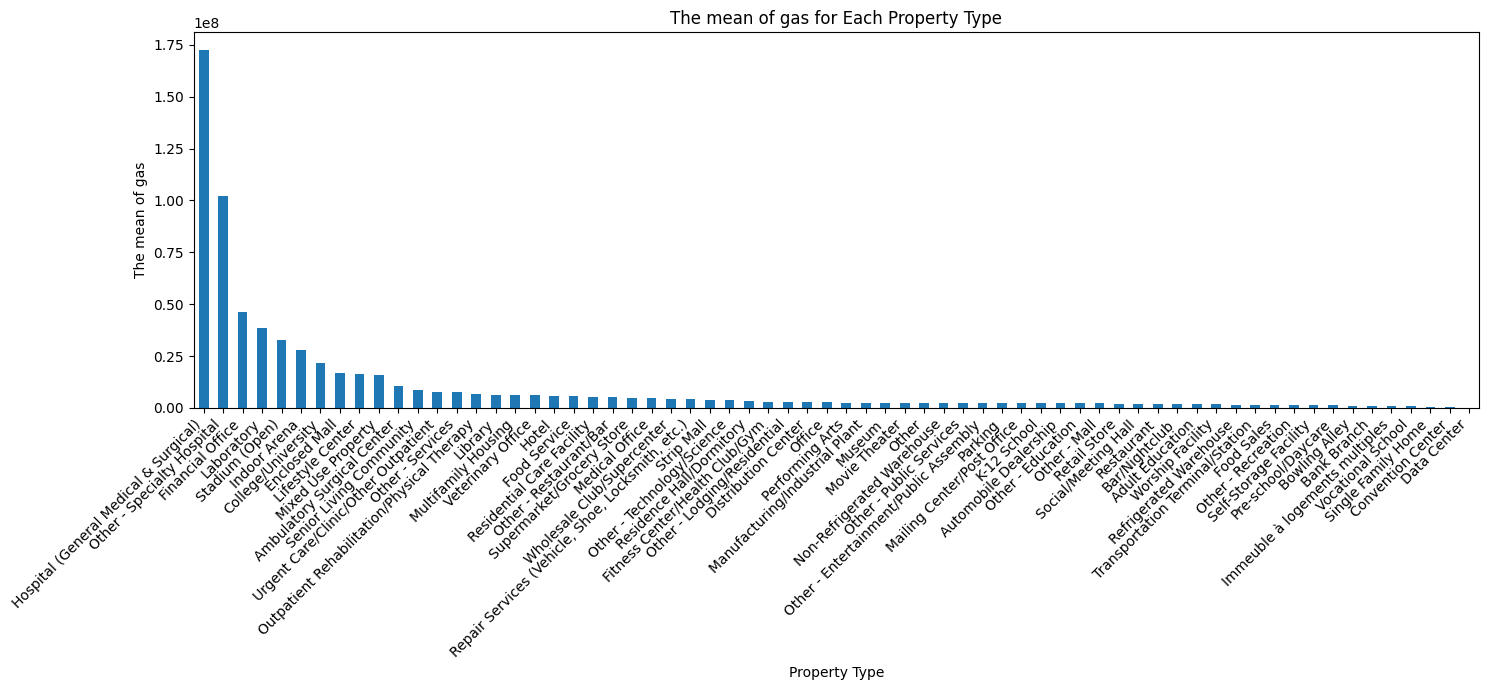

In [19]:
gas_avg_per_property_type_sorted.plot(kind='bar', figsize=(15,7))
plt.title('The mean of gas for Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('The mean of gas')
plt.xticks(rotation=45, ha='right')  # rotate x labels for better readability
plt.tight_layout()
plt.show()

In [20]:
df['Electricity Use - Grid Purchase (kBtu)'] = pd.to_numeric(df['Electricity Use - Grid Purchase (kBtu)'], errors='coerce')
df = df.dropna(subset=['Electricity Use - Grid Purchase (kBtu)'])
df['Electricity Use - Grid Purchase (kBtu)'] = df['Electricity Use - Grid Purchase (kBtu)'].astype(int)
elec_avg_per_property_type = df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Electricity Use - Grid Purchase (kBtu)'].mean()
elec_avg_per_property_type_sorted = elec_avg_per_property_type.sort_values(ascending=False)
print(elec_avg_per_property_type_sorted)

Primary Property Type - Portfolio Manager-Calculated
Data Center                        2.876262e+08
Other - Specialty Hospital         9.939038e+07
Stadium (Open)                     6.891737e+07
Financial Office                   6.412548e+07
Indoor Arena                       5.860596e+07
                                       ...     
Other - Education                  1.217200e+06
Pre-school/Daycare                 1.201713e+06
Bar/Nightclub                      9.169080e+05
Convention Center                  8.018660e+05
Transportation Terminal/Station    4.967310e+05
Name: Electricity Use - Grid Purchase (kBtu), Length: 66, dtype: float64


<ipython-input-20-943e0b69a8de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electricity Use - Grid Purchase (kBtu)'] = df['Electricity Use - Grid Purchase (kBtu)'].astype(int)


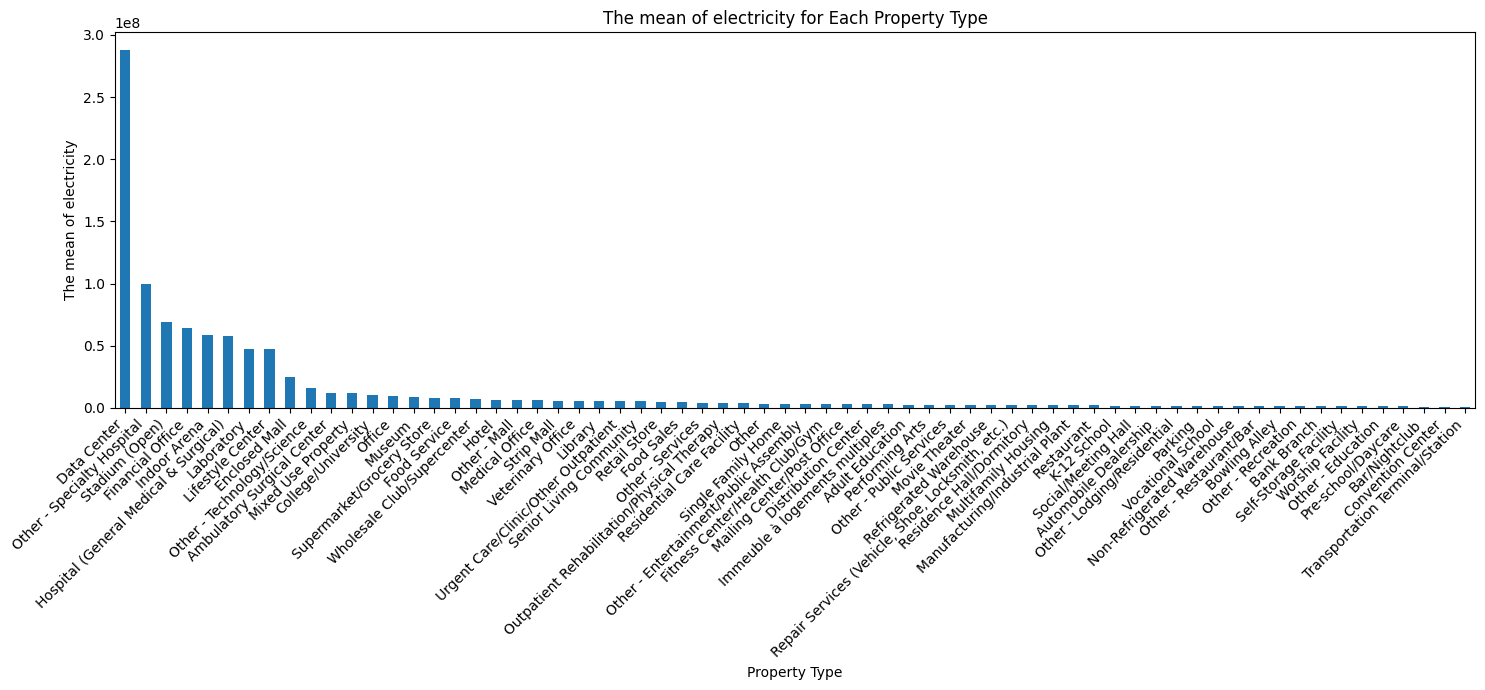

In [21]:
elec_avg_per_property_type_sorted.plot(kind='bar', figsize=(15,7))
plt.title('The mean of electricity for Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('The mean of electricity')
plt.xticks(rotation=45, ha='right')  # rotate x labels for better readability
plt.tight_layout()
plt.show()

In [22]:
df['Water Use (All Water Sources) (kgal)'] = pd.to_numeric(df['Water Use (All Water Sources) (kgal)'], errors='coerce')
df = df.dropna(subset=['Water Use (All Water Sources) (kgal)'])
df['Water Use (All Water Sources) (kgal)'] = df['Water Use (All Water Sources) (kgal)'].astype(int)
water_avg_per_property_type = df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Water Use (All Water Sources) (kgal)'].mean()
water_avg_per_property_type_sorted = water_avg_per_property_type.sort_values(ascending=False)
print(water_avg_per_property_type_sorted)

Primary Property Type - Portfolio Manager-Calculated
Other                                    284672.400000
Lifestyle Center                         191740.500000
Wholesale Club/Supercenter                36224.714286
Hospital (General Medical & Surgical)     33584.120000
Laboratory                                32891.625000
                                             ...      
Food Sales                                  448.000000
Parking                                     383.869565
Self-Storage Facility                       305.845528
Other - Recreation                          303.000000
Transportation Terminal/Station             174.333333
Name: Water Use (All Water Sources) (kgal), Length: 63, dtype: float64


<ipython-input-22-3e66eb4404fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Water Use (All Water Sources) (kgal)'] = df['Water Use (All Water Sources) (kgal)'].astype(int)


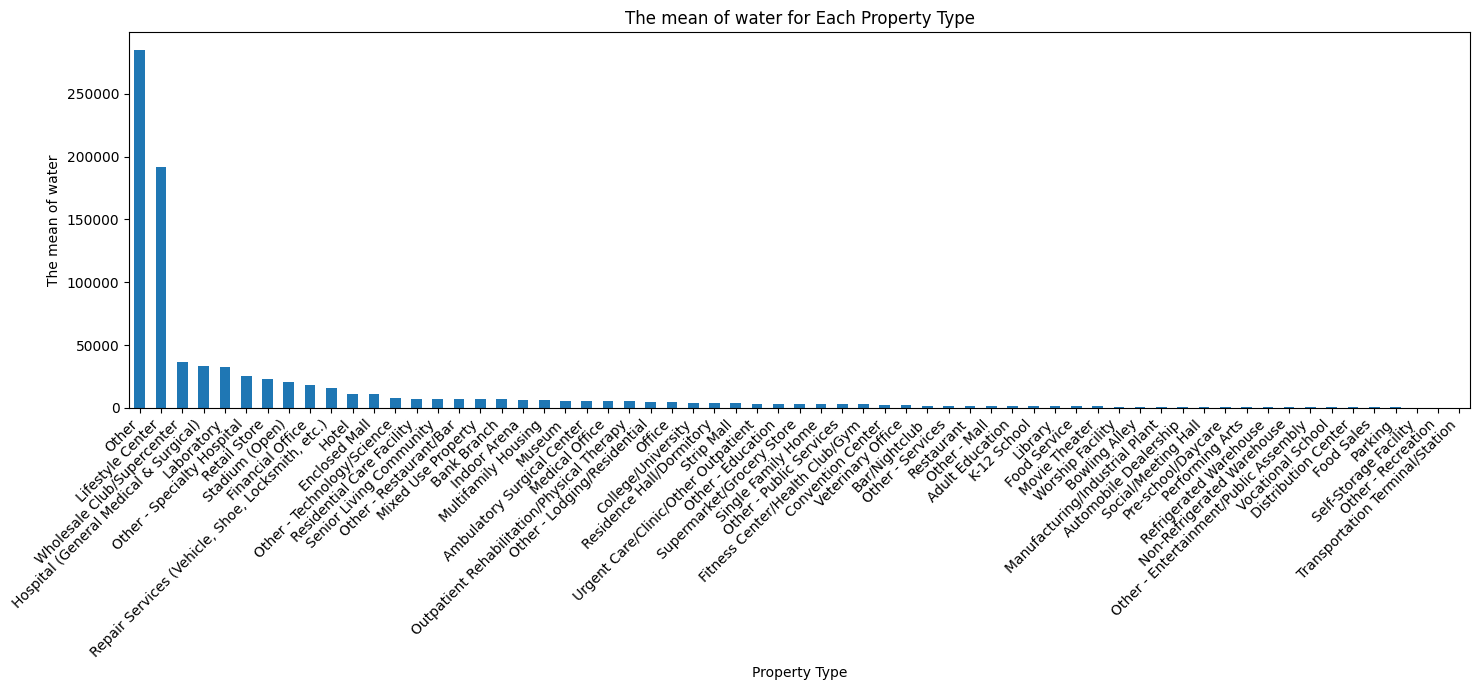

In [23]:
water_avg_per_property_type_sorted.plot(kind='bar', figsize=(15,7))
plt.title('The mean of water for Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('The mean of water')
plt.xticks(rotation=45, ha='right')  # rotate x labels for better readability
plt.tight_layout()
plt.show()

#Failed LINEAR REGRESSION

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df=pd.read_csv('/content/drive/MyDrive/energy_track_data.csv')

In [105]:
df_p = df[['Site EUI (kBtu/ft²)','Net Emissions (Metric Tons CO2e)']]
columns_to_clean = ['Net Emissions (Metric Tons CO2e)','Site EUI (kBtu/ft²)']

for column in columns_to_clean:
    # Convert non-numeric values to NaN and numbers to numeric type
    df_p[column] = pd.to_numeric(df_p[column], errors='coerce')

# Drop rows where any of the specified columns have NaN
df_p = df_p.dropna(subset=columns_to_clean)
df_p = df_p.rename(columns={"Site EUI (kBtu/ft²)": "seui"})
df_p = df_p.rename(columns={"Net Emissions (Metric Tons CO2e)": "ne"})
#df_p = df_p.rename(columns={'Primary Property Type - Portfolio Manager-Calculated': "pt"})


<ipython-input-105-bf2ce7cd3a17>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p[column] = pd.to_numeric(df_p[column], errors='coerce')


In [107]:
# Calculate Q1, Q3, and IQR for 'ne'
Q1_ne = df_p['ne'].quantile(0.25)
Q3_ne = df_p['ne'].quantile(0.75)
IQR_ne = Q3_ne - Q1_ne

# Calculate Q1, Q3, and IQR for 'seui'
Q1_seui = df_p['seui'].quantile(0.25)
Q3_seui = df_p['seui'].quantile(0.75)
IQR_seui = Q3_seui - Q1_seui

# Define bounds for 'ne'
lower_bound_ne = Q1_ne - 1.5 * IQR_ne
upper_bound_ne = Q3_ne + 1.5 * IQR_ne

# Define bounds for 'seui'
lower_bound_seui = Q1_seui - 1.5 * IQR_seui
upper_bound_seui = Q3_seui + 1.5 * IQR_seui

# Filter rows without outliers for both columns
df_no = df_p[(df_p['ne'] >= lower_bound_ne) & (df_p['ne'] <= upper_bound_ne) &
            (df_p['seui'] >= lower_bound_seui) & (df_p['seui'] <= upper_bound_seui)]


In [113]:
df_no.sort_values('ne',ascending=False)

,seui,ne
12707,67.0,992.7
23292,80.0,992.1
23988,74.2,992.0
13797,88.9,991.7
1741,20.6,989.7
...,...,...
29072,20.3,-72.8
24317,47.7,-119.1
27160,66.6,-137.9
28769,45.9,-173.0


In [114]:
# Features (X)
X = df_no.drop('ne', axis=1)

# Target (y)
y = df_no['ne']

In [115]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Predict the emission on the test set
y_pred = reg.predict(X_test)

# Display results
print(f"Intercept: {reg.intercept_}")
print(f"Mean squared error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {r2_score(y_test, y_pred)}")

Intercept: 148.09194739857787
Mean squared error (MSE): 36582.8285119783
R2 score: 0.09495022568743083


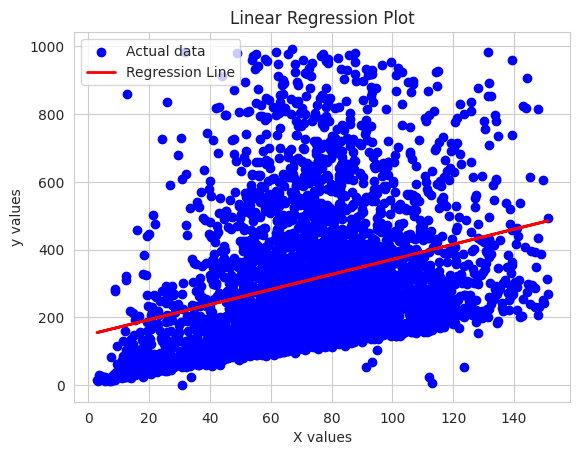

In [116]:
# Plot actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual data')

# Plot predicted regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

In [97]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge = Ridge(alpha=0.5)  # You can adjust the alpha parameter here

# Fit the model
ridge.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test)

# Display results
print(f"Intercept: {ridge.intercept_}")
print(f"Mean squared error (MSE): {mean_squared_error(y_test, y_pred_ridge)}")
print(f"R2 score: {r2_score(y_test, y_pred_ridge)}")

# To get the coefficients of the predictors:
for col, coef in zip(X.columns, ridge.coef_):
    print(f"{col}: {coef}")


Intercept: [133.54556957]
Mean squared error (MSE): 2064283.9749877464
R2 score: 0.01242813224731465
seui: [5.36828323]


In [102]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
X_filtered = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]
y_filtered = y[X_filtered.index]


,ne
0,107.5
1,398.6
2,1323.0
3,7582.1
4,483.4
...,...
29834,225.3
29835,1599.1
29836,577.7
29837,76.8


In [104]:
# Calculate Q1, Q3, and IQR
Q1 = y_filtered.quantile(0.25)
Q3 = y_filtered.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
y_filtered_no_outliers = y_filtered[(y_filtered >= lower_bound) & (y_filtered <= upper_bound)]
X_filtered_no_outliers = X_filtered[y_filtered_no_outliers.index]
X_filtered_no_outliers = X_filtered_no_outliers.to_frame()

KeyError: ignored

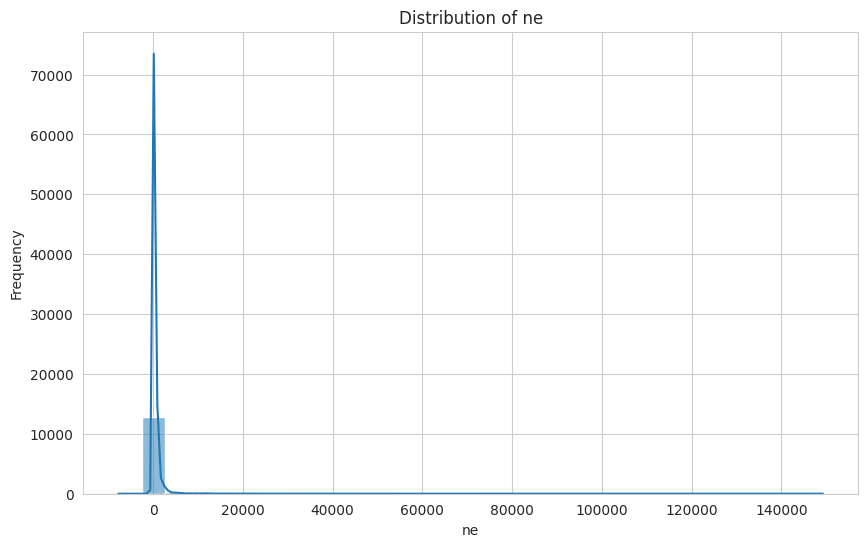

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Iterate over each predictor and plot its distribution
for column in y_filtered.columns:
    plt.figure(figsize=(10, 6))

    # Plot histogram
    sns.histplot(y_filtered[column], kde=True, bins=30)  # `kde=True` adds a Kernel Density Estimation plot

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.show()

In [ ]:
print("\nCoefficients:")
for feature, coef in zip(X.columns, reg.coef_):
    print(f"{feature}: {coef}")

In [28]:
# random forest model
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
RF = RandomForestRegressor()
RF.fit(X_train, y_train.values.ravel())
RF_predict = RF.predict(X_test)

# Predict using Random Forest Regressor
RF_predict = RF.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, RF_predict)
mse = mean_squared_error(y_test, RF_predict)
r2 = r2_score(y_test, RF_predict)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 44.43520542563819
Mean Squared Error (MSE): 1029666.4099982388
R^2 Score: 0.00445496457804917


In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
# Convert the 'Net Emissions (Metric Tons CO2e)' column to float
df_p['Net Emissions (Metric Tons CO2e)'] = pd.to_numeric(df_p['Net Emissions (Metric Tons CO2e)'], errors='coerce')

# Handle potential NaN values after conversion (you can choose other ways to handle NaNs too)
df_p = df_p.dropna(subset=['Net Emissions (Metric Tons CO2e)'])

# One-hot encoding
df_encoded = pd.get_dummies(df_p, columns=['Primary Property Type - Portfolio Manager-Calculated'])

# Split the data into training and testing sets
X = df_encoded.drop(columns=['Site EUI (kBtu/ft²)'])
y = df_encoded['Site EUI (kBtu/ft²)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')  # Objective is set to squared error for regression tasks
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")




Mean Absolute Error (MAE): 42.84537236461555
Mean Squared Error (MSE): 1024743.6763673833
R^2 Score: 0.009214567279773878


In [ ]:
column_names_list = df_encoded.columns.tolist()
column_names_list=column_names_list[3:]
column_names_list

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

  # Assuming your dataframe is named df, the categorical variable is named 'cat_variable' and the numerical variable is 'b'
mod = ols('ne~ pt', data=df_p).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(mod, typ=2)  # Type 2 ANOVA DataFrame
print(anova_table)

                sum_sq       df         F    PR(>F)
pt        7.147410e+09     62.0  1.096729  0.280994
Residual  1.437845e+12  13679.0       NaN       NaN
